In [4]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
pipeline_path = r"ssd_mobilenet_v2_320x320_coco17_tpu-8\pipeline.config"

In [12]:
configs = config_util.get_configs_from_pipeline_file(pipeline_path)
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(r"ssd_mobilenet_v2_320x320_coco17_tpu-8\ckpt-2").expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

In [13]:
category_index = label_map_util.create_category_index_from_labelmap(r"custom data/label_map.pbtxt")

In [14]:
IMAGE_PATH = ("custom data/images/Train/Cars271.png")

INFO:tensorflow:depth of additional conv before box predictor: 0


INFO:tensorflow:depth of additional conv before box predictor: 0


INFO:tensorflow:depth of additional conv before box predictor: 0


INFO:tensorflow:depth of additional conv before box predictor: 0


INFO:tensorflow:depth of additional conv before box predictor: 0


INFO:tensorflow:depth of additional conv before box predictor: 0


INFO:tensorflow:depth of additional conv before box predictor: 0


INFO:tensorflow:depth of additional conv before box predictor: 0


INFO:tensorflow:depth of additional conv before box predictor: 0


INFO:tensorflow:depth of additional conv before box predictor: 0


INFO:tensorflow:depth of additional conv before box predictor: 0


INFO:tensorflow:depth of additional conv before box predictor: 0


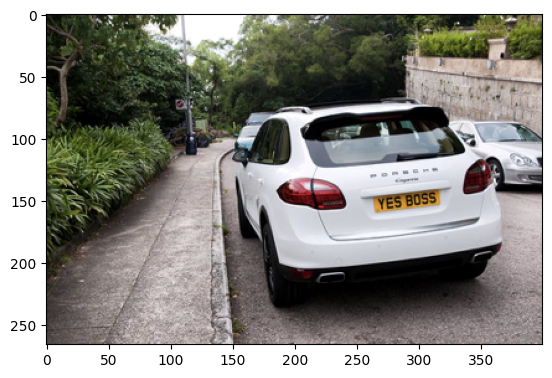

In [15]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.3,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [8]:
detections.keys()

dict_keys(['detection_boxes', 'detection_scores', 'detection_classes', 'raw_detection_boxes', 'raw_detection_scores', 'detection_multiclass_scores', 'detection_anchor_indices', 'num_detections'])